In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
arrivals_nat = pd.read_csv("Entries of non-resident travelers by nationality.csv")
entrances_transport = pd.read_csv("Evolution the entrances of non-resident travelers by transport and border post.csv")
establishments = pd.read_csv("Number of establishments by touristic region.csv")
revenue = pd.read_csv("Touristic foreign exchange earnings.csv")
outputs_nat = pd.read_csv("Outputs of non-resident travelers by nationality.csv")
accomodation = pd.read_csv('Occupancy rate by touristic region.csv')


# Entries of non-residents by nationality
### See which markets recovered fastest after COVID

In [3]:
arrivals_nat

,Year,Entry of non-residents by nationality,European,Maghrebin,North American,Other nationalities
0,2015,4202,1298,2766,23,115
1,2016,4526,1409,2986,24,107
2,2017,5743,1688,3882,31,142
3,2018,6921,2396,4310,40,175
4,2019,7984,2752,4977,47,209
5,2020,1432,412,957,11,53
6,2021,1600,591,921,19,70


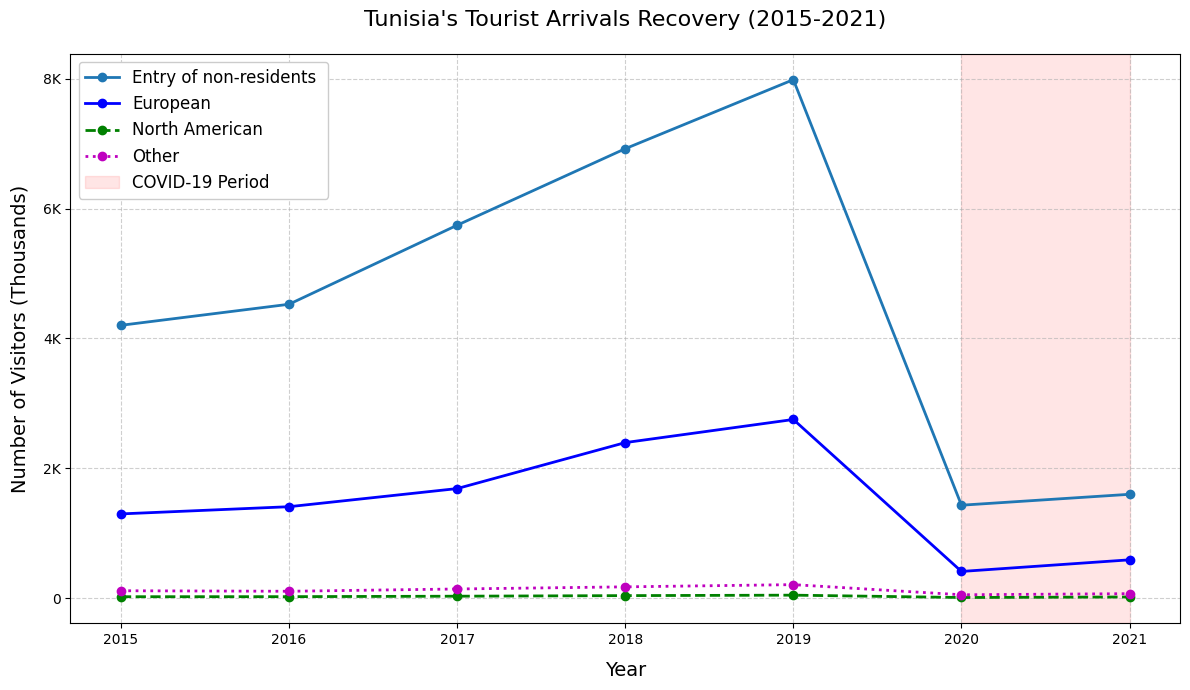

In [4]:
plt.figure(figsize=(12, 7))
plt.plot(arrivals_nat['Year'],arrivals_nat['Entry of non-residents by nationality'],label = 'Entry of non-residents ', marker='o', linewidth=2)
plt.plot(arrivals_nat['Year'],arrivals_nat['European'], 'b-', label='European', marker='o', linewidth=2)
plt.plot(arrivals_nat['Year'],arrivals_nat['North American'], 'g--', label='North American', marker='o', linewidth=2)
plt.plot(arrivals_nat['Year'],arrivals_nat['Other nationalities'], 'm:', label='Other', marker='o', linewidth=2)
plt.title("Tunisia's Tourist Arrivals Recovery (2015-2021)", fontsize=16, pad=20)
plt.xlabel("Year", fontsize=14, labelpad=10)
plt.ylabel("Number of Visitors (Thousands)", fontsize=14, labelpad=10)
plt.grid(True, linestyle='--', alpha=0.6)
plt.axvspan(2020, 2021, color='red', alpha=0.1, label='COVID-19 Period')
plt.legend(loc='upper left', fontsize=12, framealpha=1)
plt.yticks([0, 2000, 4000, 6000, 8000], 
           ['0', '2K', '4K', '6K', '8K'])
plt.tight_layout()
plt.savefig('tunisia_tourism_recovery.png', dpi=300, bbox_inches='tight')

Tourist Arrivals by Origin (2015–2021)
Non-resident entries peaked in 2019, then dropped drastically in 2020.

Europeans make up the largest identifiable foreign group, with significant drops during COVID-19.

North Americans are minimal in number and show very limited variation.

Other categories show small but steady contributions, except during COVID-19.

Key Insight:

Recovery may depend heavily on European tourism, which suffered the most during COVID.

Data past 2021 is missing — filling 2022–2023 could show whether international recovery matches domestic/neighboring trends.

# Entrances by transport mode

In [5]:
entrances_transport

,Year,Aerial way,Terrestrial way,Seaway
0,2015,1700,2422,81
1,2016,1961,2490,75
2,2017,2340,3317,86
3,2018,3166,3665,90
4,2019,3577,4310,97
5,2020,587,812,33
6,2021,794,751,56
7,2022,2391,2670,109
8,2023,3324,4755,56


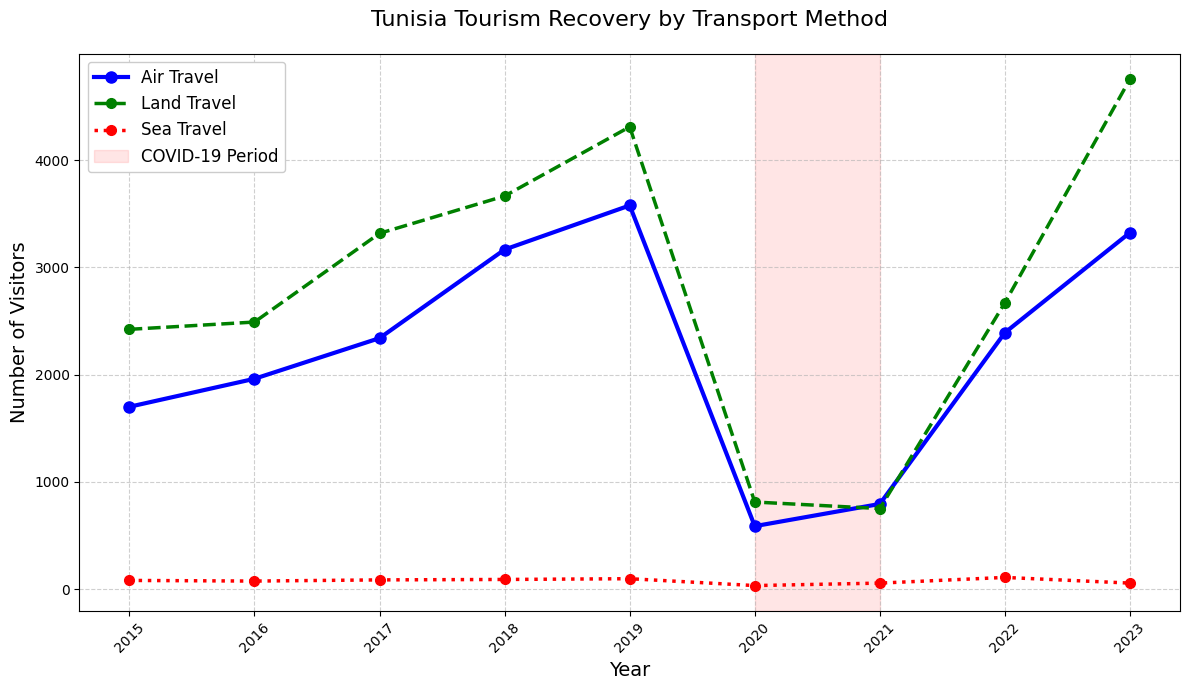

In [6]:
plt.figure(figsize=(12, 7))
plt.plot(entrances_transport['Year'], entrances_transport['Aerial way'], 
         'b-', label='Air Travel', linewidth=3, marker='o', markersize=8)
plt.plot(entrances_transport['Year'], entrances_transport['Terrestrial way'], 
         'g--', label='Land Travel', linewidth=2.5, marker='o', markersize=7)
plt.plot(entrances_transport['Year'], entrances_transport['Seaway'], 
         'r:', label='Sea Travel', linewidth=2.5, marker='o', markersize=7)
plt.axvspan(2020, 2021, color='red', alpha=0.1, label='COVID-19 Period')
plt.title('Tunisia Tourism Recovery by Transport Method', fontsize=16, pad=20)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Visitors', fontsize=14)
plt.xticks(entrances_transport['Year'], rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(loc='upper left', fontsize=12, framealpha=1)
plt.tight_layout()
plt.show()

Recovery by Transport Method
Land Travel (Green): Consistently the largest share of visitors, with a strong post-pandemic rebound in 2023 — surpassing pre-COVID levels.

Air Travel (Blue): Shows a steady climb until 2019, a steep drop in 2020, and partial recovery by 2023.

Sea Travel (Red): Always a minor contributor, with minimal fluctuations except a sharp decline in 2020.

Key Insight:

Land borders (likely from Algeria/Libya) are crucial for tourism volume. Air travel recovery is slower — possibly due to flight availability, costs, or health concerns.



In [7]:
arrivals_nat

,Year,Entry of non-residents by nationality,European,Maghrebin,North American,Other nationalities
0,2015,4202,1298,2766,23,115
1,2016,4526,1409,2986,24,107
2,2017,5743,1688,3882,31,142
3,2018,6921,2396,4310,40,175
4,2019,7984,2752,4977,47,209
5,2020,1432,412,957,11,53
6,2021,1600,591,921,19,70


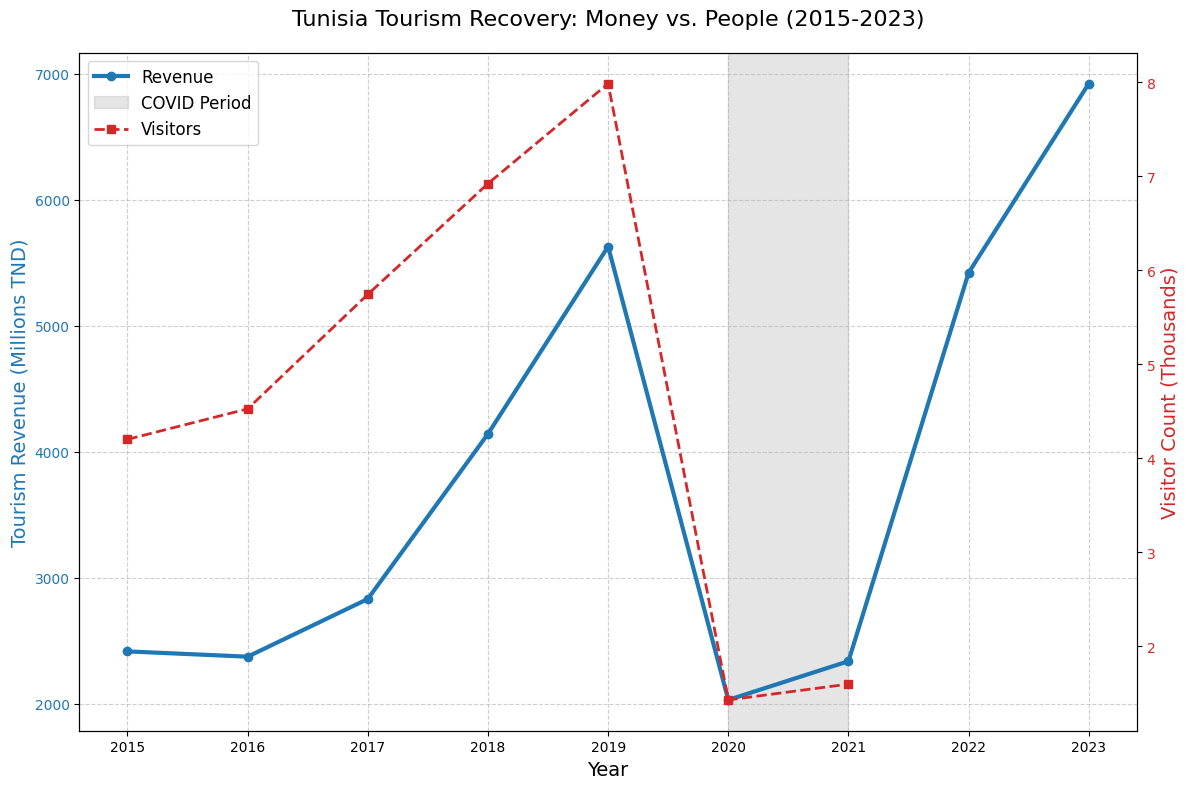

In [8]:

fig, ax1 = plt.subplots(figsize=(12, 8))
color = 'tab:blue'
ax1.set_xlabel('Year', fontsize=14)
ax1.set_ylabel('Tourism Revenue (Millions TND)', color=color, fontsize=14)
ax1.plot(revenue['Year'], revenue['Currency Recipe'], 
         color=color, marker='o', linewidth=3, label='Revenue')
ax1.tick_params(axis='y', labelcolor=color)
ax1.grid(True, linestyle='--', alpha=0.6)
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Visitor Count (Thousands)', color=color, fontsize=14)
ax2.plot(arrivals_nat['Year'], arrivals_nat['Entry of non-residents by nationality']/1000, 
         color=color, marker='s', linestyle='--', linewidth=2, label='Visitors')
ax2.tick_params(axis='y', labelcolor=color)
ax1.axvspan(2020, 2021, color='grey', alpha=0.2, label='COVID Period')
pre_covid = revenue['Year'].tolist().index(2019)
current = revenue['Year'].tolist().index(2023)
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left', fontsize=12)
plt.title('Tunisia Tourism Recovery: Money vs. People (2015-2023)', fontsize=16, pad=20)
fig.tight_layout()
plt.show()

Tourism Recovery: Money vs People (2015–2023)
Revenue Trend (Blue):

Revenue was relatively stable from 2015–2016, then saw strong growth from 2017–2019.

In 2020, there was a dramatic drop due to COVID-19, followed by a gradual rebound and record highs by 2023.

Visitor Count (Red):

Visitor numbers followed a similar upward trend until 2019, then crashed in 2020.

Post-2021, recovery was slower for visitor numbers compared to revenue — meaning higher revenue per visitor.

Key Insight:

The gap between the speed of revenue recovery vs. visitor recovery hints at higher spending per tourist, currency effects, or pricing strategies post-COVID.



# Tourist Spending per Capita:

In [9]:
arrivals_nat

,Year,Entry of non-residents by nationality,European,Maghrebin,North American,Other nationalities
0,2015,4202,1298,2766,23,115
1,2016,4526,1409,2986,24,107
2,2017,5743,1688,3882,31,142
3,2018,6921,2396,4310,40,175
4,2019,7984,2752,4977,47,209
5,2020,1432,412,957,11,53
6,2021,1600,591,921,19,70


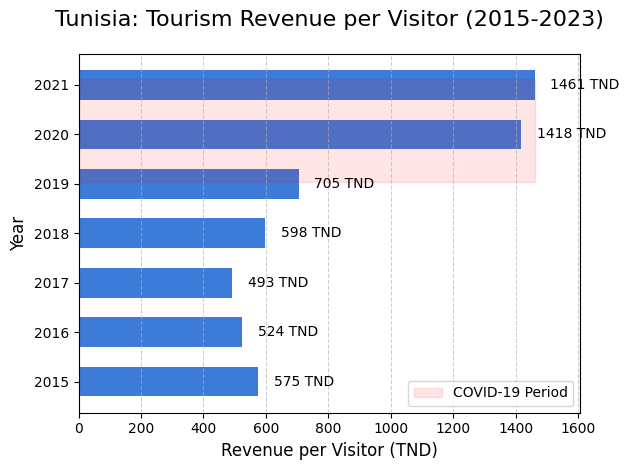

In [10]:
arrivals_nat['Revenue_per_visitor'] = (revenue['Currency Recipe'] / arrivals_nat['Entry of non-residents by nationality']) * 1000
bars = plt.barh(arrivals_nat['Year'], arrivals_nat['Revenue_per_visitor'], 
                color="#0C5AD0", alpha=0.8, height=0.6)
plt.axvspan(0, max(arrivals_nat['Revenue_per_visitor']), 
            ymin=(2020 - arrivals_nat['Year'].min() - 0.5) / (arrivals_nat['Year'].nunique()),
            ymax=(2021 - arrivals_nat['Year'].min() + 0.5) / (arrivals_nat['Year'].nunique()),
            color='red', alpha=0.1, label='COVID-19 Period')
for bar in bars:
    width = bar.get_width()
    plt.text(width + 50, bar.get_y() + bar.get_height()/2,
             f'{width:.0f} TND', ha='left', va='center')
    
plt.title('Tunisia: Tourism Revenue per Visitor (2015-2023)', fontsize=16, pad=20)
plt.xlabel('Revenue per Visitor (TND)', fontsize=12)
plt.ylabel('Year', fontsize=12)
plt.xlim(0, max(arrivals_nat['Revenue_per_visitor']) * 1.1)
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.legend(loc='lower right', frameon=True)

plt.tight_layout()
plt.savefig('revenue_per_visitor.png', dpi=300, bbox_inches='tight')
plt.show()

Pre-COVID (2015–2019): Stable growth from ~500 TND to ~700 TND per visitor.

COVID (2020–2021): Doubled to ~1,400–1,460 TND due to fewer but higher-spending travelers, longer stays, and price/currency effects.
Tunisia’s tourism shifted from volume-focused to value-focused, benefiting economically without full visitor recovery.

In [11]:
accomodation

,Region,2015,2016,2017,2018,2019,2020,2021,2022,2023,Total
0,Tunis,18,19,30,31,33,9,10,21,25,21.777778
1,Nabeul,23,24,28,33,38,8,10,23,32,24.333333
2,Sousse,24,23,37,42,47,7,12,29,39,28.888889
3,Monastir,24,45,40,52,58,11,14,37,46,36.333333
4,Mahdia,19,25,42,44,48,8,20,35,40,31.222222
5,Mednine,18,21,41,53,54,7,23,46,53,35.111111
6,Gafsa,7,7,15,17,20,4,12,15,23,13.333333
7,Kasserine,16,16,19,21,19,10,12,14,18,16.111111
8,Bizerte,17,14,14,13,16,9,11,16,20,14.444444
9,Jendouba,24,23,27,29,32,10,20,33,38,26.222222


In [12]:
establishments

,Region,2015,2016,2017,2018,2019,2020,2021,2022,2023,Total
0,Tunis,141,112,121,124,127,124,128,130,133,1140
1,Nabeul,115,116,126,124,127,130,129,129,131,1127
2,Sousse,107,107,107,109,108,101,104,104,105,952
3,Monastir,47,42,43,47,47,48,48,46,47,415
4,Mahdia,75,67,72,74,74,76,81,81,82,682
5,Mednine,167,165,166,175,177,179,169,169,150,1517
6,Gafsa,90,92,89,89,84,85,53,52,52,686
7,Kasserine,13,13,13,11,13,14,14,14,14,119
8,Bizerte,25,27,28,31,32,33,36,37,38,287
9,Jendouba,37,39,39,40,43,42,26,26,27,319


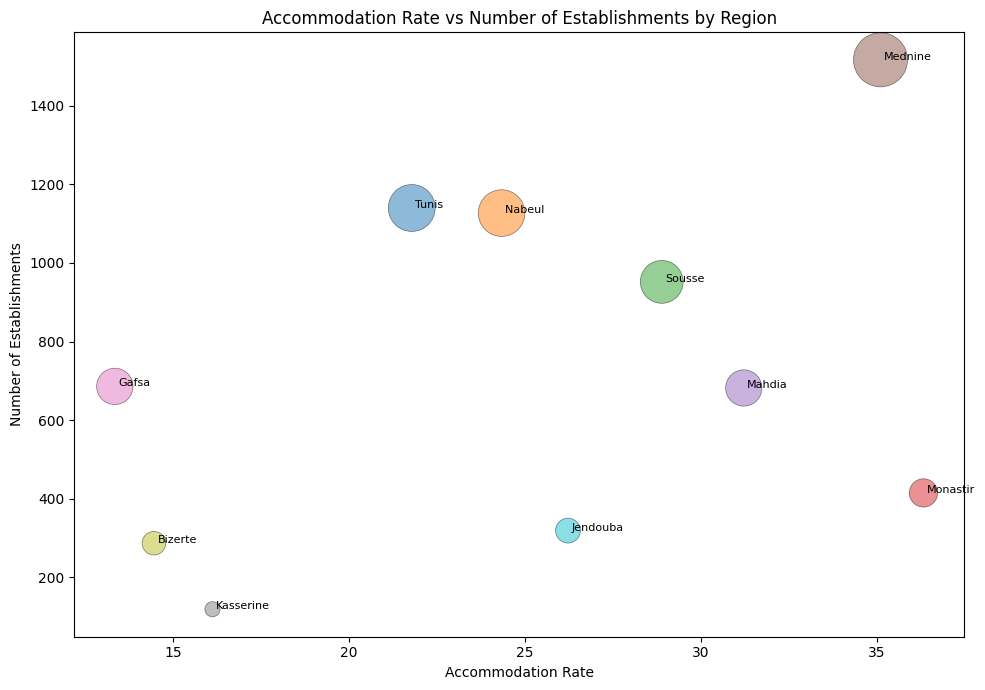

In [13]:

colors = ['#1f77b4','#ff7f0e','#2ca02c','#d62728','#9467bd',
          '#8c564b','#e377c2','#7f7f7f','#bcbd22','#17becf']

plt.figure(figsize=(10,7))
plt.scatter(accomodation['Total'], establishments['Total'],
            s=establishments['Total'],
            c=colors, alpha=0.5, edgecolors='k', linewidth=0.5)

for i, region in enumerate(accomodation['Region']):
    plt.text(accomodation['Total'][i] + 0.1,   
             establishments['Total'][i] + 0.1,
             region,
             fontsize=8)

plt.xlabel('Accommodation Rate')
plt.ylabel('Number of Establishments')
plt.title('Accommodation Rate vs Number of Establishments by Region')
plt.tight_layout()
plt.show()


This bubble chart compares how full hotels are (accommodation rate) with how many establishments each region has, showing both demand and supply sides of tourism in Tunisia.

Tourism Leaders – High rate & many establishments
Coastal hubs such as Sousse, Nabeul (Hammamet), and Medenine (Djerba) combine strong demand with large infrastructure, representing mature markets and reliable revenue sources.

High Potential – High rate & few establishments
These emerging destinations have busy hotels but limited capacity, indicating opportunities for new investments to meet growing demand.

Overcapacity – Low rate & many establishments
Regions with plenty of infrastructure but lower occupancy may struggle with seasonality, competition, or low visibility, and would benefit from targeted marketing or product diversification.

Niche Markets – Low rate & few establishments
Often inland or desert areas focusing on cultural heritage, eco-tourism, or adventure travel, serving smaller but specialized markets.

 Tunisia’s tourism is heavily concentrated in a few coastal hubs. Expanding and promoting inland and emerging regions could spread benefits, reduce concentration risk, and strengthen year-round tourism performance.